<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [17]:
##### Your Code Here #####
from keras.datasets import boston_housing
import pandas as pd

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()


In [18]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [19]:
x_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [20]:
y = y_train

y = y_train / y_train.max()

x = x_train

In [21]:
#normalize
import keras
keras.utils.normalize(x_train, axis=0, order=2)

array([[6.15626701e-03, 0.00000000e+00, 3.10983151e-02, ...,
        5.61526372e-02, 5.38018011e-02, 6.35435054e-02],
       [1.08742552e-04, 1.55659962e-01, 7.75547662e-03, ...,
        3.93068460e-02, 5.35957574e-02, 1.05566401e-02],
       [2.44669243e-02, 0.00000000e+00, 6.91498162e-02, ...,
        5.40134891e-02, 5.09036340e-02, 1.10658028e-02],
       ...,
       [1.73128932e-04, 6.60375595e-02, 2.31518169e-02, ...,
        4.51895032e-02, 4.91048185e-02, 2.65782931e-02],
       [1.07352925e-02, 0.00000000e+00, 7.48040553e-02, ...,
        3.93068460e-02, 3.55086465e-02, 5.35978606e-02],
       [7.18789766e-05, 1.13207245e-01, 1.11938653e-02, ...,
        4.17133876e-02, 5.10635890e-02, 1.48675509e-02]])

In [37]:
from keras.models import Sequential
from keras.layers import Dense, Activation


model = Sequential([
    Dense(13, input_shape=(13,)),
    Dense(13),
    Dense(13),
])

model.add(Dense(1, input_shape=(13,)))


model.compile(optimizer='rmsprop',
             loss='mse', 
             metrics=['mae'])



model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_25 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_26 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 14        
Total params: 560
Trainable params: 560
Non-trainable params: 0
_________________________________________________________________


In [38]:
history = model.fit(x_train, y_train, batch_size=100, epochs=100, validation_split=.10)
scores = model.evaluate(x_test, y_test)
print(model.metrics_names)


Train on 363 samples, validate on 41 samples
Epoch 1/100
363/363 [==============================] - 0s 223us/step - loss: 18732.2124 - mae: 127.6806 - val_loss: 2818.5950 - val_mae: 51.8938
Epoch 2/100
363/363 [==============================] - 0s 16us/step - loss: 1883.3209 - mae: 39.2981 - val_loss: 528.9257 - val_mae: 20.4769
Epoch 3/100
363/363 [==============================] - 0s 14us/step - loss: 574.1859 - mae: 20.5311 - val_loss: 251.5125 - val_mae: 13.5506
Epoch 4/100
363/363 [==============================] - 0s 17us/step - loss: 372.7321 - mae: 15.9052 - val_loss: 166.3416 - val_mae: 10.8690
Epoch 5/100
363/363 [==============================] - 0s 17us/step - loss: 279.9379 - mae: 13.3852 - val_loss: 129.1844 - val_mae: 9.7394
Epoch 6/100
363/363 [==============================] - 0s 17us/step - loss: 236.6748 - mae: 12.2264 - val_loss: 127.1764 - val_mae: 9.5642
Epoch 7/100
363/363 [==============================] - 0s 17us/step - loss: 223.7457 - mae: 11.8114 - val_loss:

In [41]:
import matplotlib.pyplot as plt

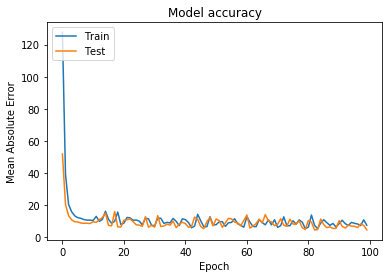

In [50]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model accuracy')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

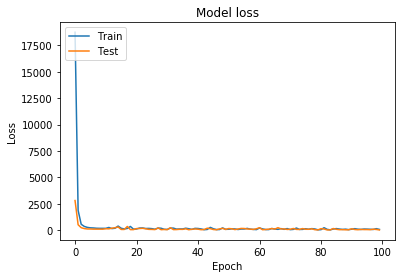

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [ ]:
##### Your Code Here #####

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.